# 음성 합성(Speech Synthesis)

* https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/SpeechSynthesis/Tacotron2

## Tacotron 2

* 텍스트에서 멜 스펙트로그램 생성

* https://pytorch.org/hub/nvidia_deeplearningexamples_tacotron2/

<img src="https://pytorch.org/assets/images/tacotron2_diagram.png" alt="alt" width="50%"/>

## WaveGlow

* 멜 스펙트로그램에서 음성 생성

* https://pytorch.org/hub/nvidia_deeplearningexamples_waveglow/

<img src="https://pytorch.org/assets/images/waveglow_diagram.png" alt="alt" width="50%"/>

In [2]:
!pip install numpy scipy librosa unidecode inflect

     |████████████████████████████████| 245kB 7.2MB/s 


* LJ Speech dataset에서 사전 학습된 Tacotron2와 WaveGlow 모델 로드

In [4]:
import torch

tacotron2 = torch.hub.load("nvidia/DeepLearningExamples:torchhub", 'nvidia_tacotron2')
waveglow = torch.hub.load("nvidia/DeepLearningExamples:torchhub", 'nvidia_waveglow')

Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


In [5]:
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

Tacotron2(
  (embedding): Embedding(148, 512)
  (encoder): Encoder(
    (convolutions): ModuleList(
      (0): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (lstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (prenet): Prenet(
      (layers): ModuleList(
        (0): LinearNorm(
          (lin

In [7]:
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0): WN(
      (in_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
        (1): Conv1d(51

## Text To Speech(TTS)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def plot_data(data, figsize = (16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize = figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect = 'auto', origin = 'bottom',
                       interpolation = 'none', cmap = 'viridis')


def TTS(next):

    sampling_rate = 22050

    sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
    sequence = torch.from_numpy(sequence).to(device = 'cuda', dtype = torch.int64)

    with torch.no_grad():
        mel_outputs, mel_outputs_postnet, _, alignments = tacotron2.infer(sequence)
        audio = waveglow.infer(mel_outputs_postnet)

    mel_output = mel_outputs.data.cpu().numpy()[0]
    mel_output_postnet = mel_outputs_postnet.data.cpu().numpy()[0]
    alignment = alignments.data.cpu().numpy()[0].T
    audio_np = audio[0].data.cpu().numpy()

    return mel_output, mel_output_postnet, alignment, audio_np, sampling_rate
    

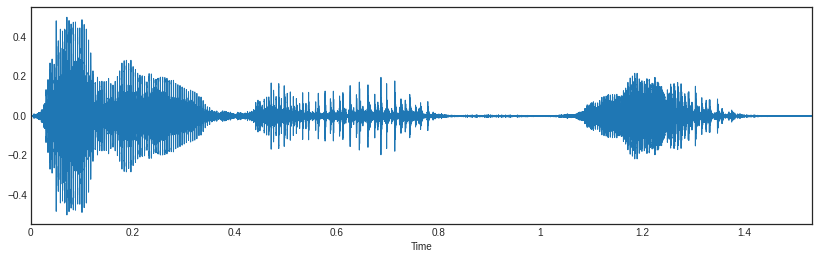

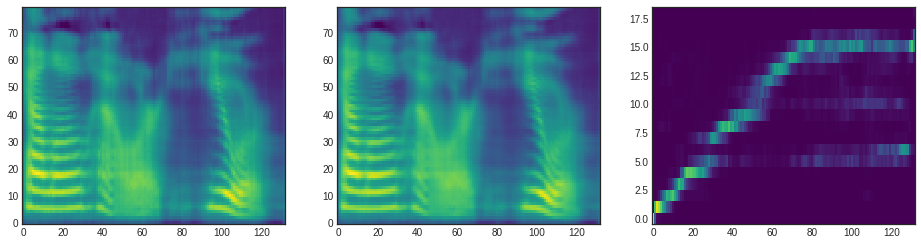

In [14]:
import librosa.display
from IPython.display import Audio

text = 'Hello, how are you?'
mmel_output, mel_output_postnet, alignment, audio_np, sampling_rate = TTS(text)

fig = plt.figure(figsize = (14, 4))
librosa.display.waveplot(audio_np, sr = sampling_rate)
plot_data((mmel_output, mel_output_postnet, alignment))

Audio(audio_np, rate = sampling_rate)

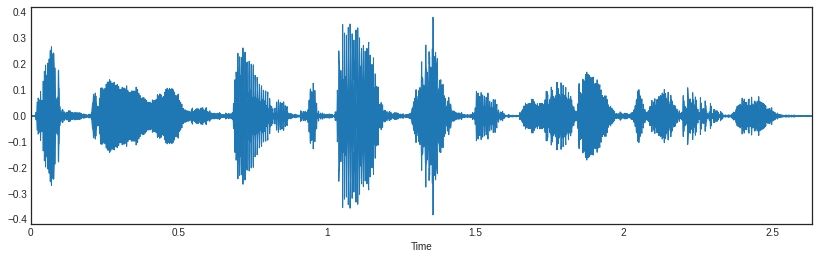

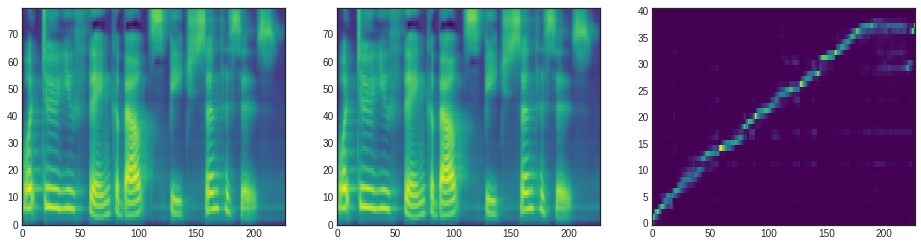

In [15]:

text = 'what do you think about speech synthesis?'
mmel_output, mel_output_postnet, alignment, audio_np, sampling_rate = TTS(text)

fig = plt.figure(figsize = (14, 4))
librosa.display.waveplot(audio_np, sr = sampling_rate)
plot_data((mmel_output, mel_output_postnet, alignment))

Audio(audio_np, rate = sampling_rate)

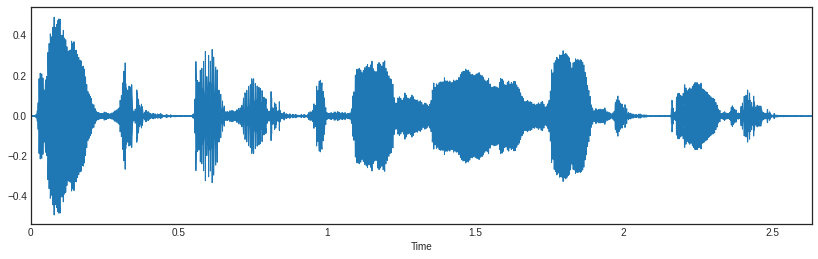

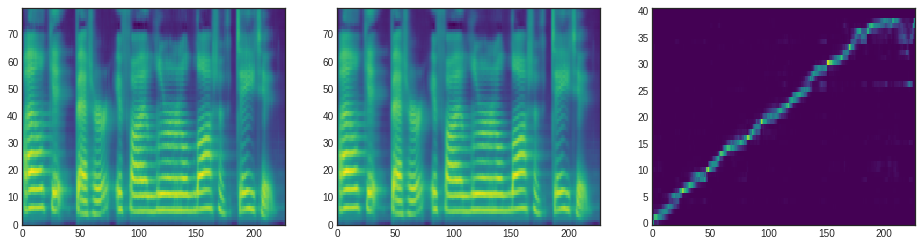

In [16]:

text = "I'll get better if I learn a lot of data."
mmel_output, mel_output_postnet, alignment, audio_np, sampling_rate = TTS(text)

fig = plt.figure(figsize = (14, 4))
librosa.display.waveplot(audio_np, sr = sampling_rate)
plot_data((mmel_output, mel_output_postnet, alignment))

Audio(audio_np, rate = sampling_rate)